# DSC630 PA - Project Milestone - 3
## Bellevue University
### Winter Term- 2021
# Walmart Sales Forecasting
### Nitin Mahajan | Ganesh Kale

## Abstract - 

Sales Forecasting is the process of using a company’s sales records over the past few years to predict the short-term or long-term sales performance of the company in the future. This is one of the pillars of proper financial planning. Sales forecasting is a globally conducted corporate practice where number of objectives are identified, action-plans are chalked out as well as budgets and resources are allotted to them. Here in this project, we are going to build the Sales Forecast Model that would learn from the past sales records, events and predict the accurate sales so company will be ready to source appropriate resources before the actual event happens.
The Sales Forecast Model will be machine learning model built using python, trained, and tested on Walmart sales data, the detailed use cases and technical information is provided in the paper.

## Background - 

Walmart, Inc. is part of the retail and wholesale business and is based in Bentonville, Arkansas. The President, Chief Executive Officer, and Director is C. Douglas McMillon. Walmart operates Walmart, Walmart Neighborhood Market, Wal-Mart, Walmart.com, and Sam’s Club. Retail companies commonly have issues with predicting sales accurately throughout the days, months, and years ahead. There are many varying factors that can cause issues with predicting sales such as holidays, economic factors, temperature, fuel prices, Consumer Price Index (CPI), and unemployment. Sales are the lifeblood of business. With an accurate sales forecast in hand, one can plan wisely. If the varying factors are not predicted correctly, then there could be staffing issues at stores, financial implications, and the business could become obsolete if customer satisfaction goes down. 
	
   Business Sales Executives often find themselves scrambling for answers when it comes to sales forecasting during business reviews with their leaderships team. The Sales Forecast Model will help sales executives to find such answers upfront and be ready with numbers and predictions to share with leaderships team. This model would help individual stores to upscale their customer satisfaction by stocking the right products at right time and decrease overstocking and wastage of food products. 

## 1.2.	Problem Statement - 

The goal of this analysis is to predict future sales for the Walmart stores based on the varying features and events mentioned in the introduction.
In addition, Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. 

* Build the Machine Learning model that would learn from past records and predict the accurate outcomes.
* Predict the Sales forecast for Store and its departments on specific week of the year considering if it is before holiday or after holiday.
* Modeling the effects of markdowns on the holiday weeks in the absence of complete/ideal historical data and predict the sales.

## Data Info - 

The data ranges from February 5, 2010, through November 1, 2012. This file contains anonymized information about the 45 stores, indicating the type and size of store.

stores.csv:  This file contains anonymized information about the 45 stores, indicating the type and size of store.

* Store - Store number, numerical value
* Type - Type of Store, either A/B/C, categorical value
* size - The size of store, numerical value
    
train.csv: This is the historical training data, which covers to 2010-02-05 to 2012-11-01. Within this file we will find the following fields:

* Store - the store number
* Dept - the department number
* Date - the week
* Weekly_Sales - sales for the given department in the given store
* IsHoliday - whether the week is a special holiday week

test.csv: This file is identical to train.csv, except we have withheld the weekly sales. Our goal is to predict the sales for each triplet of store, department, and date in this file.
features.csv: This file contains additional data related to the store, department, and regional activity for the given dates. 

It contains the following fields:

* Store - the store number
* Date - the week
* Temperature - average temperature in the region
* Fuel_Price - cost of fuel in the region
* MarkDown1-5 - anonymized data related to promotional markdowns that Walmart is running. Markdown data is only available  after Nov 2011 and is not available for all stores all the time. Any missing value is marked with an NA.
* CPI - the consumer price index
* Unemployment - the unemployment rate
* IsHoliday - whether the week is a special holiday week


#### _import packages_

In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

#### _Load data sets_

In [2]:
# load each csv file into separate dfs

train_df = pd.read_csv("Data/train.csv")

features_df = pd.read_csv("Data/features.csv")

stores_df = pd.read_csv("Data/stores.csv")

test_df = pd.read_csv("Data/test.csv")

In [3]:
# display head of each df

train_df.shape
train_df.head()

print(40*'--')

features_df.shape
features_df.head()

print(40*'--')

stores_df.shape
stores_df.head()

print(40*'--')

test_df.shape
test_df.head()

(421570, 5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


--------------------------------------------------------------------------------


(8190, 12)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


--------------------------------------------------------------------------------


(45, 3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


--------------------------------------------------------------------------------


(115064, 4)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


## Data Prepration:

* Merge data - Features and store
* Add features & store info to train and test df

In [4]:
# create new df from features_df and store_df

feature_store = features_df.merge(stores_df, how='left', on = 'Store')

In [5]:
# merge feature_store df into train and test dfs

train = train_df.merge(feature_store,how='inner',on=['Store','Date','IsHoliday'])

test = test_df.merge(feature_store,how='inner',on=['Store','Date','IsHoliday'])

In [6]:
# statistical summary 

train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### _Insights:_
Based on above statistical summary we see that Weekly_sales have minimum value as negative number and sales values cannot be negative, profit margin can be negative but sales, so it seems data issue, we are going to remove that record from the dataset.

In [7]:
# remove negative sales values from the dataset

train = train.loc[train['Weekly_Sales']>0]
train.reset_index(drop=True,inplace=True)

In [8]:
# display info of train and test dfs

train.info()

print(40*'--')

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   MarkDown1     150181 non-null  float64
 8   MarkDown2     110904 non-null  float64
 9   MarkDown3     136651 non-null  float64
 10  MarkDown4     134518 non-null  float64
 11  MarkDown5     150929 non-null  float64
 12  CPI           420212 non-null  float64
 13  Unemployment  420212 non-null  float64
 14  Type          420212 non-null  object 
 15  Size          420212 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.5+ MB
------------------------

### _Insights:_
Based on above information, we see that the Date feature type is object, we need to change it to date and create new columns week and year from it.

In [9]:
# change data type of Date feature to date and create two new features from it - year and week

train['Date'] = pd.to_datetime(train.Date)

test['Date'] = pd.to_datetime(test.Date)


# new columns

train['year'] = train.Date.dt.year
test['year'] = test.Date.dt.year

train['week'] = train.Date.dt.isocalendar().week
test['week'] = test.Date.dt.isocalendar().week

In [10]:
# display info and head of train and test dfs

train.info()

print(40*'--')

train.head()

print(40*'--')

test.info()

print(40*'--')

test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420212 entries, 0 to 420211
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         420212 non-null  int64         
 1   Dept          420212 non-null  int64         
 2   Date          420212 non-null  datetime64[ns]
 3   Weekly_Sales  420212 non-null  float64       
 4   IsHoliday     420212 non-null  bool          
 5   Temperature   420212 non-null  float64       
 6   Fuel_Price    420212 non-null  float64       
 7   MarkDown1     150181 non-null  float64       
 8   MarkDown2     110904 non-null  float64       
 9   MarkDown3     136651 non-null  float64       
 10  MarkDown4     134518 non-null  float64       
 11  MarkDown5     150929 non-null  float64       
 12  CPI           420212 non-null  float64       
 13  Unemployment  420212 non-null  float64       
 14  Type          420212 non-null  object        
 15  Size          420

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2010,5


--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 115064 entries, 0 to 115063
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     114915 non-null  float64       
 7   MarkDown2     86437 non-null   float64       
 8   MarkDown3     105235 non-null  float64       
 9   MarkDown4     102176 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           76902 non-null   float64       
 12  Unemployment  76902 non-null   float64       
 13  Type          115064 non-null  object 

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,year,week
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,44
1,1,2,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,44
2,1,3,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,44
3,1,4,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,44
4,1,5,2012-11-02,False,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,A,151315,2012,44


#### Missing values:

* find the missing values from the datasets
* handle the missing values

<AxesSubplot:>

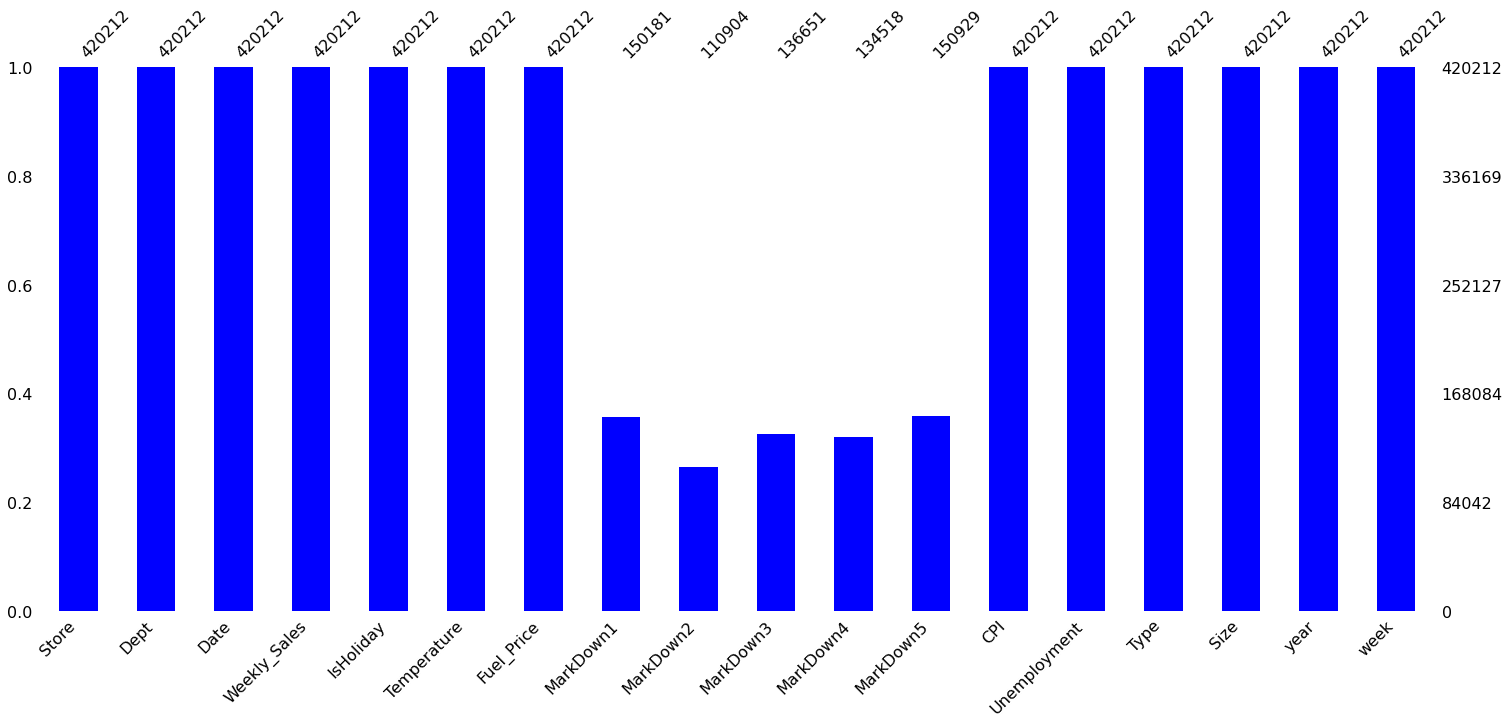

In [11]:
# display bar charts of missing values

msno.bar(train,color ='b')

In [12]:
# null values percentage

train.isna().sum()/train.shape[0]*100

Store            0.000000
Dept             0.000000
Date             0.000000
Weekly_Sales     0.000000
IsHoliday        0.000000
Temperature      0.000000
Fuel_Price       0.000000
MarkDown1       64.260659
MarkDown2       73.607608
MarkDown3       67.480462
MarkDown4       67.988063
MarkDown5       64.082654
CPI              0.000000
Unemployment     0.000000
Type             0.000000
Size             0.000000
year             0.000000
week             0.000000
dtype: float64

### _Insights:_

Based on above bar chart and % data about null/na values in the data set we see that all the features are having values except markdown features.The markdowns are not running all the times at all the stores because this we see lots of null values and percentage is above 65%.
We are going to check if these markdowns have any correlation with sales values or other features if not then will drop them from both of the datasets - train and test.

## Exploratory Data Analysis:

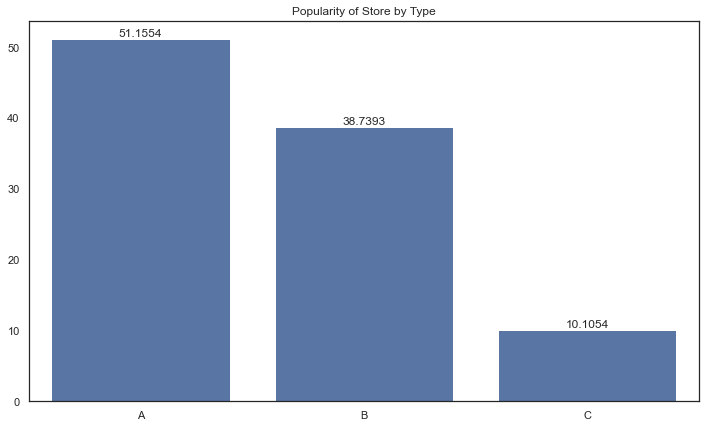

In [13]:
# store type and its popularity

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(x=train.Type.value_counts(normalize=True).keys(),y=train.Type.value_counts(normalize=True).values*100, color='b')
plt.title('Popularity of Store by Type')
ax.bar_label(ax.containers[0]);

### _Insights:_

Based on above bar charts, we see that Store Type 'A' is more popular than store types 'B' and 'C'. Store Type 'C' is the least popular store among them.

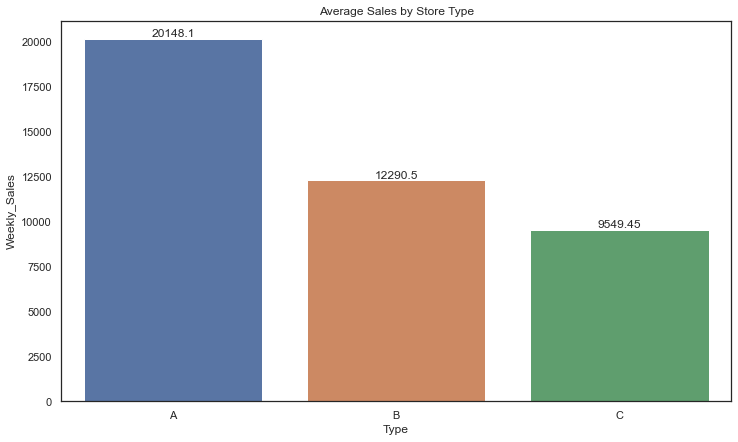

In [14]:
# store type wise average sales

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = train.groupby('Type',as_index=False)['Weekly_Sales'].mean(),x='Type',y='Weekly_Sales')
plt.title('Average Sales by Store Type')
ax.bar_label(ax.containers[0]);

### _Insights_:

Above Bar charts shows the average sales by store type for entire period of time(data availibility), Since store type 'A' is more popular having higher average sales compared to other two store types.
Based on this we see that as the popularity more higher the sales.

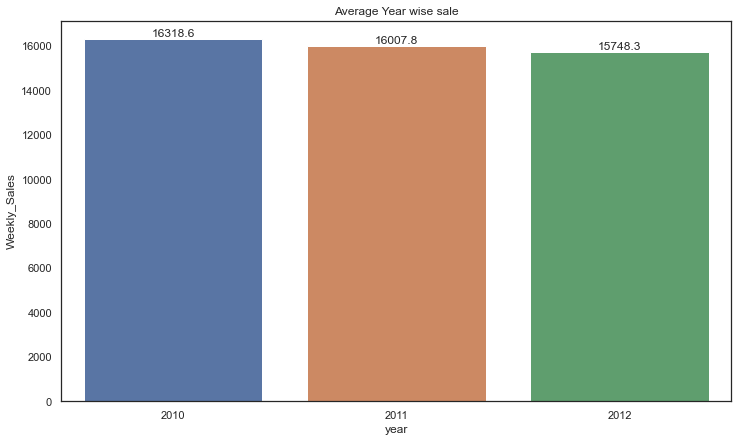

In [15]:
# average monthly sales year wise

sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = train.groupby('year',as_index=False)['Weekly_Sales'].mean(),x='year',y='Weekly_Sales')
plt.title('Average Year wise sale')
ax.bar_label(ax.containers[0]);

### _Insights_:
Above bar chart shows that the year 2010 and 2011 the sales were almost same and in year 2012 sale got bit down.

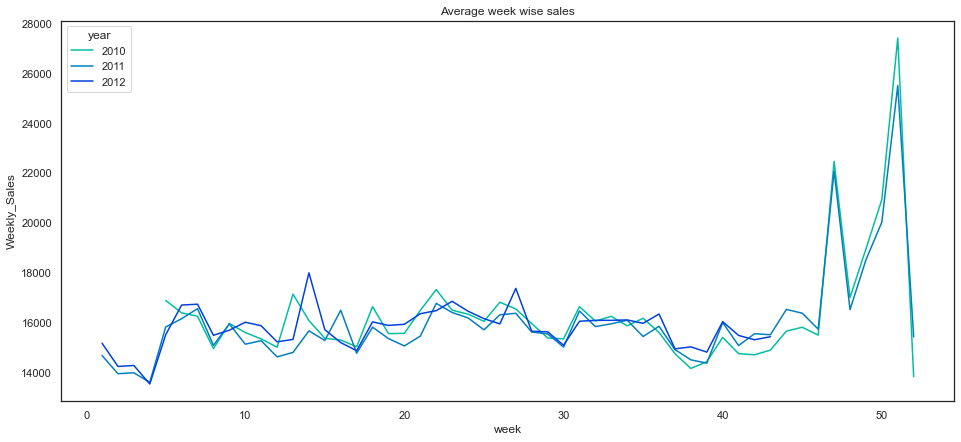

In [16]:
# average weekly sales by year

sns.set(style='white')
plt.figure(figsize=(16,7))
palette = sns.color_palette("winter_r", 3)
ax = sns.lineplot(data = train.groupby(['year','week'],as_index=False)['Weekly_Sales'].mean(),x='week',y='Weekly_Sales',hue='year',palette=palette)
plt.title('Average week wise sales');

### _Insights:_
On weekly basis the week of Thanksgiving holiday and one week before Christmas witnessed the highest sales for the years 2010 and 2011.
In 2012 the week no. 14 recorded the highest sales as compared to other weeks of the year but that doesn't correponds to any holiday or any special event

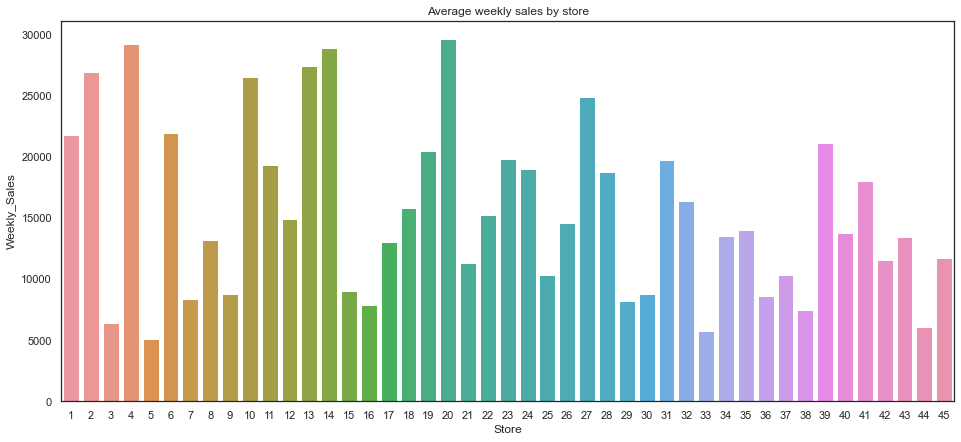

In [17]:
# average sales by store

sns.set(style='white')
plt.figure(figsize=(16,7))
palette = sns.color_palette("winter_r", 3)
ax = sns.barplot(data = train.groupby(['Type','Store'],as_index=False)['Weekly_Sales'].mean(),x='Store',y='Weekly_Sales')
plt.title('Average weekly sales by store');

### _Insights:_
The sales vary by large amount among the 45 stores.
It really depends which category of store it is and which week of the particular year is under consideration.

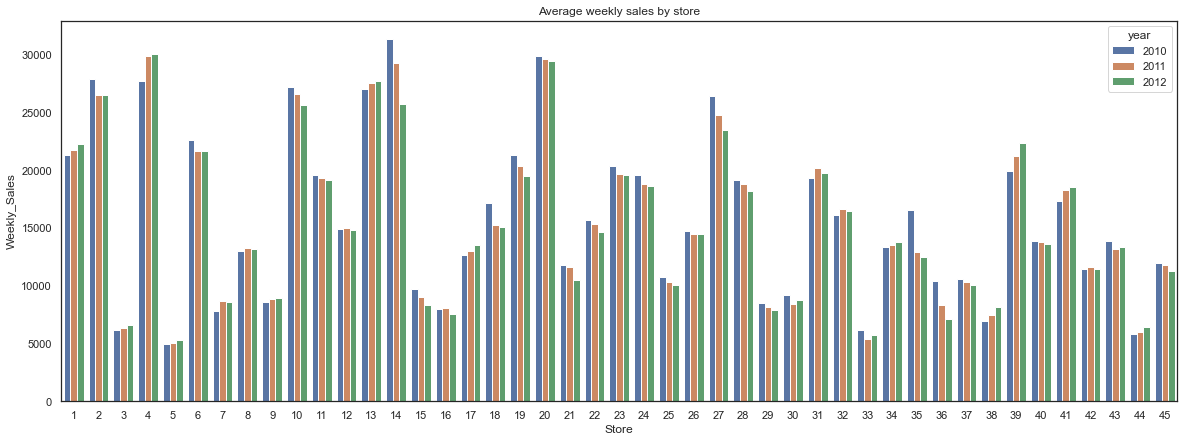

In [18]:
# average sales of store by year

sns.set(style='white')
plt.figure(figsize=(20,7))
ax = sns.barplot(data = train.groupby(['year','Store'],as_index=False)['Weekly_Sales'].mean(),x='Store',y='Weekly_Sales',hue='year')
plt.title('Average weekly sales by store');

### _Insights:_
The overall trend of store sales over the 3 years remain the same as it depends on the type of store and its size.

The stores 2,4,10,13,14 and 20 showed the highest sales in all the 3 years

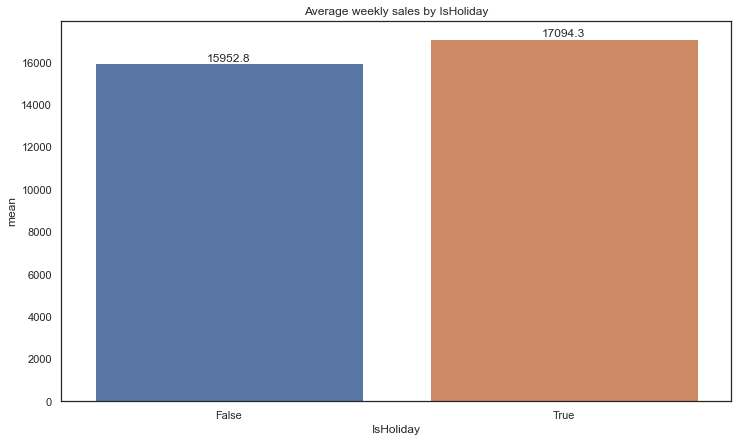

In [19]:
# average sale by holidays

data = train.groupby('IsHoliday',as_index=False)['Weekly_Sales'].agg(['mean','count']).reset_index()
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = data,x='IsHoliday',y='mean')
plt.title('Average weekly sales by IsHoliday')
ax.bar_label(ax.containers[0]);

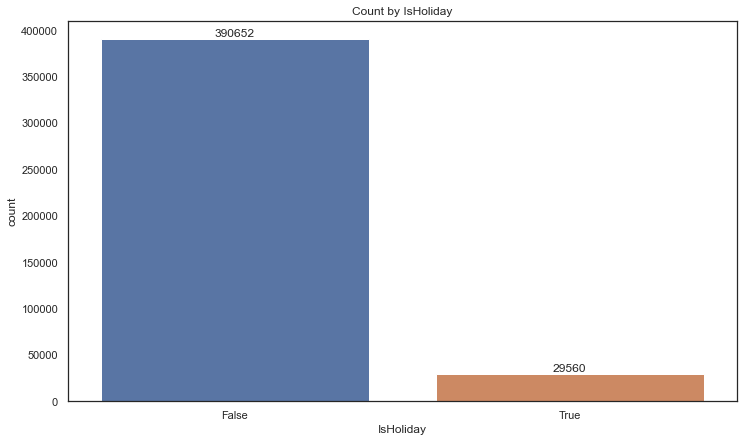

In [20]:
# Count by holidays

data = train.groupby('IsHoliday',as_index=False)['Weekly_Sales'].agg(['mean','count']).reset_index()
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = data,x='IsHoliday',y='count')
plt.title('Count by IsHoliday')
ax.bar_label(ax.containers[0]);

### _Insights:_
Only 7 percent of the weeks in the data are the holiday weeks.

Despite being the less peecentage of holiday weeks the sales in the holidays week are on the average higher than in the non-holiday weeks.

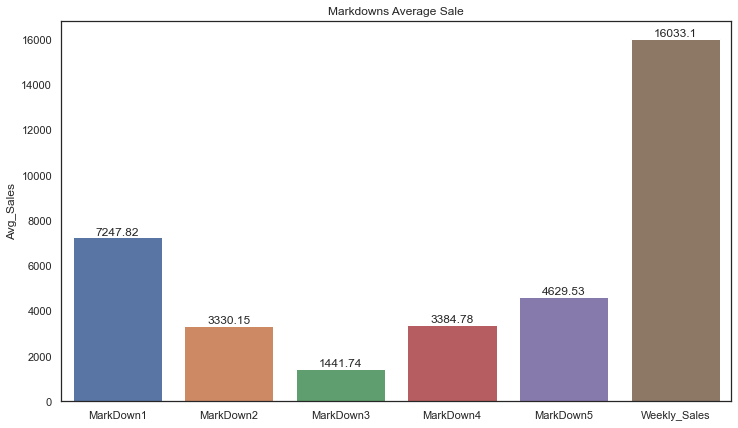

In [21]:
# average Sales by Markdowns

d = pd.DataFrame(train[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Weekly_Sales']].mean(),columns=['Avg_Sales'])
sns.set(style='white')
plt.figure(figsize=(12,7))
ax = sns.barplot(data = d, x=d.index, y='Avg_Sales')
plt.title('Markdowns Average Sale')
ax.bar_label(ax.containers[0]);

### _Insights:_

The markdowns average sales is much lower compared to weekly sales, we do not see any significance using these values as the overall markdowns average sale is lower than weekly average sale so we are going to remove these features from datasets.

In [22]:
# change the Type to numerical dtype

storetype_values = {'A':3, 'B':2, 'C':1}
train['Type_Num'] = train.Type.map(storetype_values)

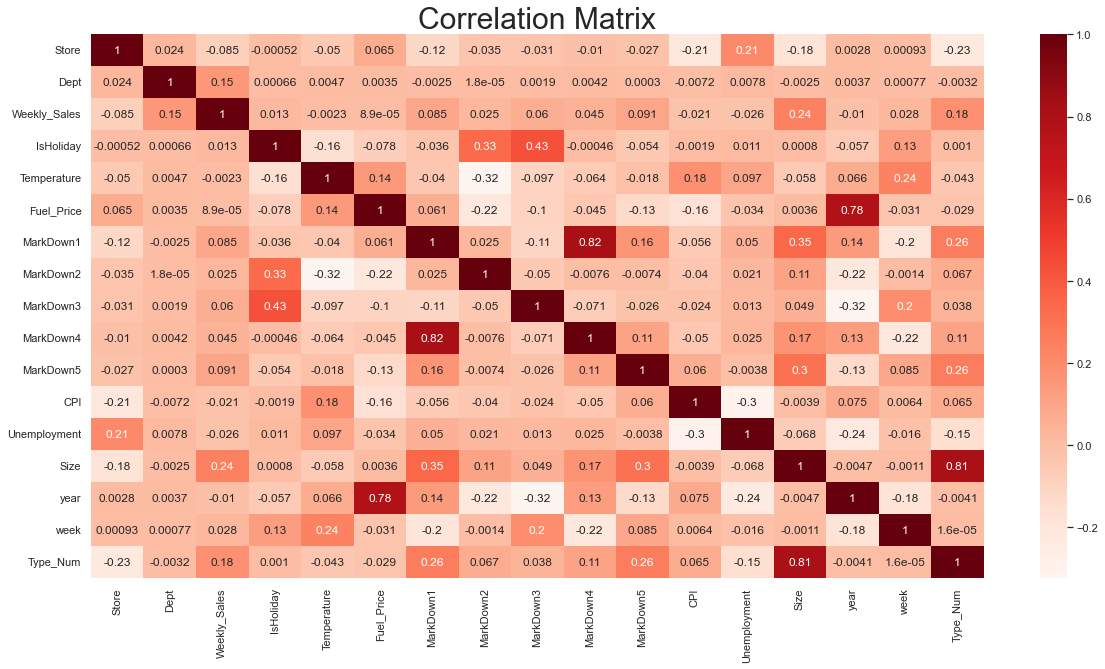

In [23]:
# correlation Matrix:

sns.set(style='white')
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), cmap='Reds', annot=True, annot_kws={'size':12})
plt.title('Correlation Matrix', fontsize=30);

### _Insights:_

* Department, Store size and Type have moderate correlation with the weekly sales
* Markdown1-5 have very weak correlation with the weekly sales, so we will leave these columns out
* Temperature. Fuel price, CPI and Unemployment are very weakly coorelated with the weekly sales, so these columns will also be dropped out
* IsHoliday will be considered for the further analysis as the sales in the holiday weeks are higher than in the non-holiday weeks

In [24]:
# remove markdown features from the datasets

train = train.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Unemployment'],axis=1)

test = test.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','Temperature','CPI','Fuel_Price','Unemployment'],axis=1)


train.head(2)

test.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,year,week,Type_Num
0,1,1,2010-02-05,24924.50,False,A,151315,2010,5,3
1,1,2,2010-02-05,50605.27,False,A,151315,2010,5,3


,Store,Dept,Date,IsHoliday,Type,Size,year,week
0,1,1,2012-11-02,False,A,151315,2012,44
1,1,2,2012-11-02,False,A,151315,2012,44


# Next Steps- 

## Modeling:

* Prepare data for modeling by changing them to numeric
* import appropriate packages to convert data to same scale , split data and train model
* Train and evaluate models/ML algorithms on training data
* tune the hyperparameter if required
* evaluate the model

### ML Algorithms used to train the models:- 

FOllowing ML algorithms will be used to train the model

* Linear Regression
* Decision Tree
* Random Forest
* Gradient Boosting Machine
* ARIMA - Auto Regressive Integrated Moving Average

## Evaluation:

All the trained models will be tested using different evaluation matrix and bsed on better score the model will be baselined.

## Deployment:

Baseline model will be tested with real time data and deployed to production.

# END